### 1. Duomenų įsikėlimas


In [138]:
import pandas as pd

# df = pd.read_table("bike-sharing.csv", sep=",", header=0)
df = pd.read_csv('./Duomenys_e.txt', sep=" ", decimal=',')
# df = df[df['workingday'] >= 1]

df

,Apskritis,a1,a2,a3,a4,a5,a6
0,Alytaus,22.5,9.3,260433,122,24.5,171585
1,Kauno,22.9,11.1,1052822,209,27.3,792675
2,Klaipedos,19.6,12.5,690000,247,28.7,850725
3,Marijampoles,19.8,7.7,146914,164,24.1,20806
4,Panevezio,22.9,9.8,396002,210,23.9,334743
5,Siauliu,21.1,8.8,296607,189,24.3,147408
6,Taurages,21.6,7.0,35921,156,22.4,17674
7,Telsiu,21.1,10.0,503425,171,24.4,115108
8,Utenos,24.5,10.3,268631,140,23.5,91212
9,Vilniaus,20.6,15.8,2502666,236,26.9,3959258


- a1 –gyventojų aprūpinimas gyvenamuoju plotu (kiek vienam gyventojui vidutiniškai tenka naudingo ploto);
- a2 – bendrasis vidaus produktas (BVP) vienam gyventojui (tūkst. Lt);
- a3 – materialinės investicijos (tūkst. Lt);
- a4 – nusikalstamumas (kiek užregistruota nusikaltimų, tenkančių 10000 gyventojų);
- a5 – gyventojų aprūpinimas telefonais butuose (100 gyventojų);
- a6 – tiesioginės užsienio investicijos (tūkst. Lt,sausio 1 d. duomenys).

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Apskritis  10 non-null     object 
 1   a1         10 non-null     float64
 2   a2         10 non-null     float64
 3   a3         10 non-null     int64  
 4   a4         10 non-null     int64  
 5   a5         10 non-null     float64
 6   a6         10 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 688.0+ bytes


In [140]:
# type(df.values) # išvedama reikšmių matrica.
# df.columns # išvedamas stulpelių pavadinimų sąrašas
df.describe() # Aprašomoji statistika.

,a1,a2,a3,a4,a5,a6
count,10.000000,10.000000,1.000000e+01,10.000000,10.000000,1.000000e+01
mean,21.660000,10.230000,6.153421e+05,184.400000,25.000000,6.501194e+05
std,1.538542,2.514867,7.243775e+05,41.001897,1.964123,1.201239e+06
min,19.600000,7.000000,3.592100e+04,122.000000,22.400000,1.767400e+04
25%,20.725000,8.925000,2.624825e+05,158.000000,23.950000,9.718600e+04
50%,21.350000,9.900000,3.463045e+05,180.000000,24.350000,1.594965e+05
75%,22.800000,10.900000,6.433562e+05,209.750000,26.300000,6.781920e+05
max,24.500000,15.800000,2.502666e+06,247.000000,28.700000,3.959258e+06


### 2. Duomenų standartizacija

In [141]:
from sklearn.preprocessing import StandardScaler
import numpy as np


new_df = df.drop(['Apskritis'], axis=1)

new_df = df

# np.random.seed(20194281)
# df1 = new_df.sample(n=10, random_state=10)

df1 = new_df
df_trans = df1.select_dtypes(include=['float64','int64'])

data_scaler = StandardScaler()
dfs_transformed = data_scaler.fit_transform(df_trans)

dfs_transformed


array([[ 0.57550448, -0.38980436, -0.51645318, -1.60420322, -0.26833674,
        -0.41991606],
       [ 0.84955423,  0.36465569,  0.63660775,  0.63242627,  1.23434902,
         0.12509317],
       [-1.41135623,  0.95145794,  0.10863996,  1.6093449 ,  1.98569191,
         0.1760323 ],
       [-1.27433135, -1.06043551, -0.68164265, -0.52445105, -0.48300614,
        -0.5522253 ],
       [ 0.84955423, -0.18023212, -0.3191772 ,  0.65813466, -0.59034084,
        -0.27674419],
       [-0.38366965, -0.59937659, -0.46381385,  0.11825857, -0.37567144,
        -0.44113148],
       [-0.04110746, -1.35383663, -0.84315637, -0.73011813, -1.39535107,
        -0.55497364],
       [-0.38366965, -0.09640323, -0.16285844, -0.34449236, -0.32200409,
        -0.46947487],
       [ 1.94575324,  0.02934011, -0.50452369, -1.14145229, -0.80501023,
        -0.49044372],
       [-0.72623184,  2.33463469,  2.74637767,  1.32655267,  1.01967963,
         2.90378379]])

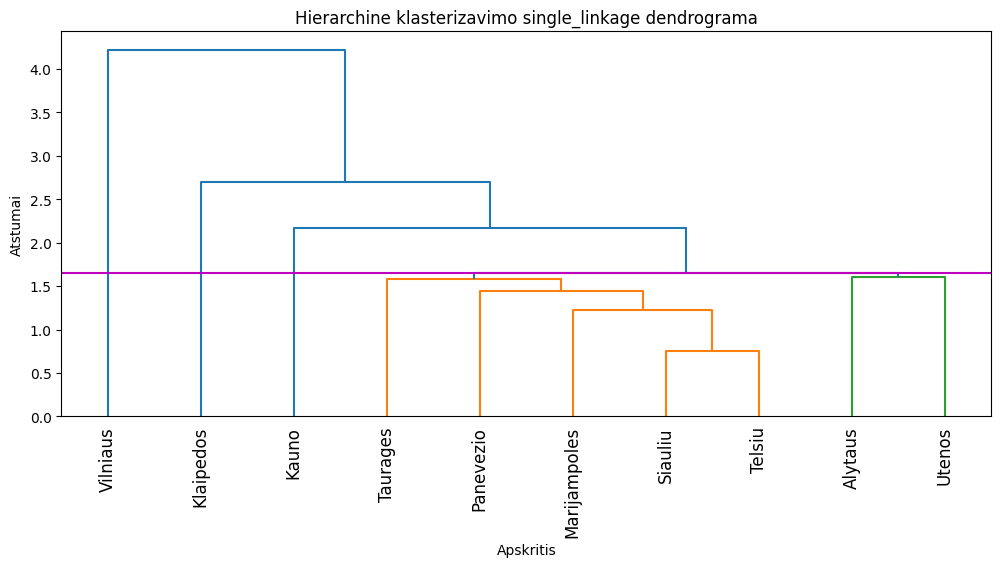

In [150]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

plt.subplots(figsize=(12, 5))
single_clustering = linkage(dfs_transformed, method="single", metric="euclidean")

D = dendrogram(single_clustering, labels=df['Apskritis'].values, color_threshold=1.61)

plt.axhline(y = 1.65, color = 'm', linestyle = '-')

plt.xlabel('Apskritis')
plt.xticks(rotation=90)
plt.ylabel('Atstumai')
plt.title('Hierarchine klasterizavimo single_linkage dendrograma')

plt.show()

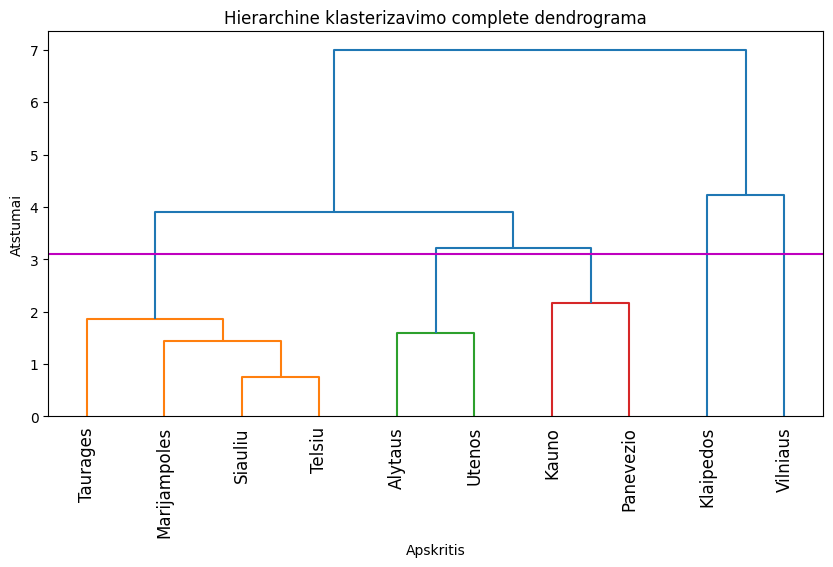

In [169]:

complete_clustering = linkage(dfs_transformed, method="complete", metric="euclidean")

plt.figure(figsize=(10, 5))
D = dendrogram(complete_clustering, labels=df['Apskritis'].values, color_threshold=3)
plt.axhline(y = 3.1, color = 'm', linestyle = '-')
plt.xlabel('Apskritis')
plt.xticks(rotation=90)
plt.ylabel('Atstumai')
plt.title('Hierarchine klasterizavimo complete dendrograma')
plt.show()


Text(0.5, 1.0, 'Hierarchine klasterizavimo average dendrograma')

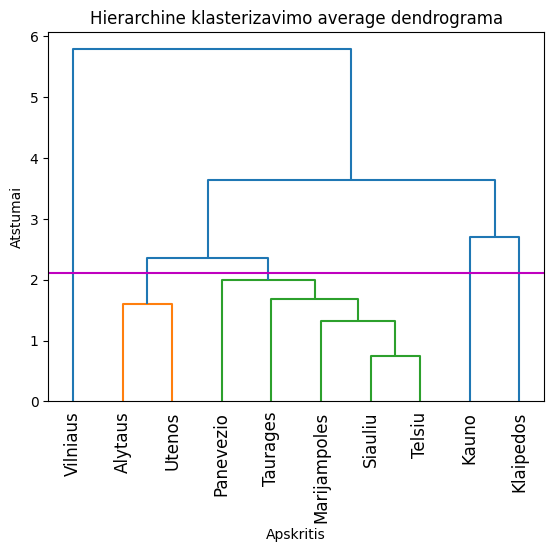

In [164]:
average_clustering = linkage(dfs_transformed, method="average", metric="euclidean")

D = dendrogram(average_clustering, labels=df['Apskritis'].values, color_threshold=2.1)
plt.axhline(y = 2.1, color = 'm', linestyle = '-')

plt.xlabel('Apskritis')
plt.xticks(rotation=90)
plt.ylabel('Atstumai')
plt.title('Hierarchine klasterizavimo average dendrograma')

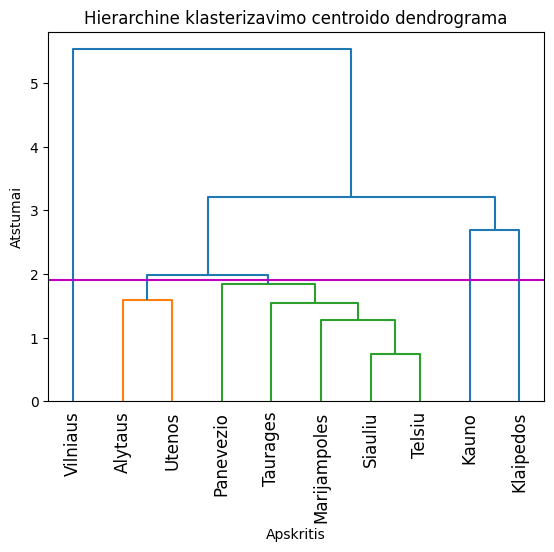

In [175]:
centroid = linkage(dfs_transformed, method="centroid", metric="euclidean")

D = dendrogram(centroid, labels=df['Apskritis'].values, color_threshold=1.9)

plt.axhline(y = 1.9, color = 'm', linestyle = '-')

plt.xlabel('Apskritis')
plt.xticks(rotation=90)
plt.ylabel('Atstumai')
plt.title('Hierarchine klasterizavimo centroido dendrograma')

plt.show()

Nehierarchinis klasterizavimo centrai

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Čia įkelkite savo duomenų rinkinį
# Pavyzdžiui:
# dfs3 = pd.read_csv('kelias_iki_duomenu.csv')

dfs_k3 = dfs3

# Inicializuojame ir pritaikome KMeans modelį
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=10)
kmeans.fit(dfs_k3)

# Priskiriamas klasterių narystės etiketas kiekvienam duomenų taškui
dfs_k3['clus_membership'] = kmeans.labels_

# Gaunami klasterių centroidai
centroids = kmeans.cluster_centers_

# Spausdinami centroidai, kad juos būtų lengva peržiūrėti
print("Centroidai yra:")
print(centroids)

# Jei norite, galite taip pat išsaugoti rezultatus į CSV failą
# dfs_k3.to_csv('klasterizuoti_duomenys.csv')

# Peržiūrimas galutinis DataFrame su klasterio narystėmis
print(dfs_k3.head())